In [1]:
import requests as req
from bs4 import BeautifulSoup as bs

In [2]:
# 1.멜론챠트 사이트에 정보를 요청
req.get('https://www.melon.com/chart/index.htm')

<Response [406]>

In [3]:
# 우회 --> 브라우저 인척 속이기
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}

In [4]:
# 2. 응답코드 확인 --> 200 체크
req.get('https://www.melon.com/chart/index.htm',headers=head)

<Response [200]>

In [5]:
# 현재까지는 text 이므로 컴이 이해하는 언어가 아니다
res=req.get('https://www.melon.com/chart/index.htm',headers=head)
res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>멜론차트>TOP100>멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t

In [6]:
# 3. bs을 통해서 html데이터로 변형 --> 컴이 이해하는 html코드

bs(res.text,"lxml")

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

In [7]:
# 4.노래 제목을 수집해보자
# html의 계층선택자 사용해보자 -> 주로 id ,class ,자식(>)
# id ,class가 없으면 무조건 자식선택자 사용
# 이유는 선택자는 확실한게 좋으므로 3개만 주로 사용
# :nth-child(2) --> 자식들 중에 2번째 --> 가상클래스선택자
# 크콜링에서 많이 사용하는 선택자
# id= ,class= ,자식(>) ,:nth-child(n)
soup = bs(res.text,"lxml")
# 선택자를 수집시 클래스 중간에 공백이 있는 경우->클래스가 복수개이다
# 공백을 놔두면 컴은 자손선택자로 보게된다
# 수정법 = 공백을 지우고 클래스마다 '.'를 통해서 이어준다
# 즉 '.'을 찍어 클래스가 2개라는 것을 컴에게 인식시킨다 
# 수집하고자 하는 태그가 id나 클래스가 없는 경우엥는 부모 태그를 검사해라
# 주의점! 부모태그가 id,클래스가 없다면 있을때까지 검사해야 한다
# soup.select("div.ellipsis rank01>span>a")  --> 
title = soup.select("div.ellipsis.rank01>span>a")

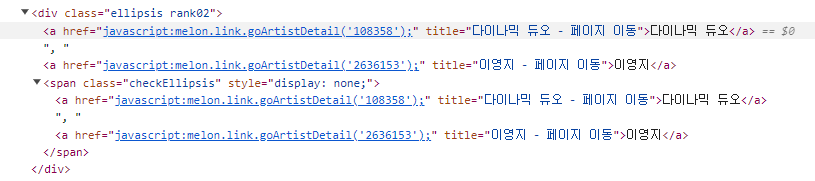

In [29]:
# 5. 가수이름 수집
# 가수이름이 a태그에 2개 있으므로 div.ellipsis.rank02>a 를 하면 컴은 div.ellipsis.rank02 안의 a태그 전체을 파악하는데 총 갯수가 103이 된다
# top 100인데 103이 되는 이유는 div.ellipsis.rank02안에 a태그가 2개 있는 경우가 3번 있기 때문이다.
#singer = soup.select("div.ellipsis.rank02>a")
#len(singer)
singer = soup.select("div.ellipsis.rank02")
singer
# 고로 
#soup.select("div.ellipsis.rank02>span.checkEllipsis")
#singer = soup.select("div.ellipsis.rank02>span.checkEllipsis")

[<div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('261143');" title="아이유 - 페이지 이동">아이유</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('261143');" title="아이유 - 페이지 이동">아이유</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('3679688');" title="TWS (투어스) - 페이지 이동">TWS (투어스)</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3679688');" title="TWS (투어스) - 페이지 이동">TWS (투어스)</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('2403002');" title="비비 (BIBI) - 페이지 이동">비비 (BIBI)</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('2403002');" title="비비 (BIBI) - 페이지 이동">비비 (BIBI)</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('236797');" title="태연 (TAEYEON) - 페이지 이동">태연 (TAEYEON)</a><s

In [9]:
# select 리스트 이므로 갯수 확인 가능
# 갯수로 데이터 검증가능
# 데이터 갯수가 정해진 경우에는 반드시 데이터의 길이(개수) 검증하고 넘어가라
# 올바르지 않은 데이터를 수집하면 활용할 때 에러가 발생
len(title)
len(singer)

100

In [10]:
# 타이틀의 데이터를 출력해보자
for i in title:
    print( i.text)

Love wins all
첫 만남은 계획대로 되지 않아
밤양갱
To. X
비의 랩소디
Love 119
에피소드
Perfect Night
그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))
사랑은 늘 도망가
Drama
헤어지자 말해요
Super Lady
인사
Wife
모래 알갱이
Seven (feat. Latto) - Clean Ver.
우리들의 블루스
꿈
Do or Die
다시 만날 수 있을까
I AM
MANIAC
이제 나만 믿어요
무지개
Get A Guitar
London Boy
Polaroid
Baddie
아버지
인생찬가
Love Lee
너의 모든 순간
A bientot
You & Me
사막에서 꽃을 피우듯
퀸카 (Queencard)
Super Shy
예뻤어
잘 지내자, 우리 (여름날 우리 X 로이킴)
Hype Boy
후라이의 꿈
연애편지
Standing Next to You
Ditto
사랑인가 봐
한 페이지가 될 수 있게
ETA
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
사건의 지평선
기억해줘요 내 모든 날과 그때를
사랑할 수밖에
첫 눈
사랑하지 않아서 그랬어
그대가 내 안에 박혔다(그내박)
Spicy
심(心)
별 떨어진다 (I Do)
취중고백
봄날
Dynamite
모든 날, 모든 순간 (Every day, Every Moment)
주저하는 연인들을 위해
Yes or No (Feat. 허윤진 of LE SSERAFIM, Crush)
Kitsch
I Don't Think That I Like Her
LOVE DIVE
Steal The Show (From “엘리멘탈”)
Discord
해요 (2022)
그대가 있는 곳, 언제 어디든
음악의 신
사랑..그게 뭔데
그중에 그대를 만나
물론
이브, 프시케 그리고 푸른 수염의 아내
손오공
파이팅 해야지 (Feat. 이영지)
OMG
다정히 내 이름을 부르면
After LIKE
Dangerously
I Love You
Fast Forward
Smoke (Prod. Dynamicduo, Padi

In [11]:
for i in singer:
    print( i.text)

아이유
TWS (투어스)
비비 (BIBI)
태연 (TAEYEON)
임재현
RIIZE
이무진
LE SSERAFIM (르세라핌)
너드커넥션 (Nerd Connection)
임영웅
aespa
박재정
(여자)아이들
범진
(여자)아이들
임영웅
정국
임영웅
태연 (TAEYEON)
임영웅
임영웅
IVE (아이브)
VIVIZ (비비지)
임영웅
임영웅
RIIZE
임영웅
임영웅
IVE (아이브)
임영웅
임영웅
AKMU (악뮤)
성시경
임영웅
제니 (JENNIE)
우디 (Woody)
(여자)아이들
NewJeans
DAY6 (데이식스)
로이킴
NewJeans
AKMU (악뮤)
임영웅
정국
NewJeans
멜로망스
DAY6 (데이식스)
NewJeans
AKMU (악뮤)
윤하 (YOUNHA)
화곡동 청개구리
볼빨간사춘기
EXO
임한별
순순희(기태)
aespa
DK(디셈버)
디오 (D.O.)
김민석
방탄소년단
방탄소년단
폴킴
잔나비
그루비룸 (GroovyRoom)
IVE (아이브)
Charlie Puth
IVE (아이브)
Lauv
QWER
#안녕
로이킴
세븐틴 (SEVENTEEN)
지아
김호중
허각
LE SSERAFIM (르세라핌)
세븐틴 (SEVENTEEN)
부석순 (SEVENTEEN)
NewJeans
경서예지, 전건호
IVE (아이브)
Charlie Puth
안세하
전소미
다이나믹 듀오, 이영지
IVE (아이브)
방탄소년단
STAYC(스테이씨)
PLAVE
H1-KEY (하이키)
IVE (아이브)
PLAVE
탑현
NewJeans
(여자)아이들
이무진
성시경, 나얼
LE SSERAFIM (르세라핌)
RIIZE
Red Velvet (레드벨벳)


In [12]:
# title,singer는 컴언어 html
# 데이터 수집이 끝나면 반드시 필요한 데이터(글자,컨텐츠)를 저장하는 작업 필수
# 리스트 변수에 담아주자.
title_list=[]
 
singer_list=[]

for i in title:
     title_list.append(i.text)
for i in singer:
     singer_list.append(i.text)

In [13]:
title_list

['Love wins all',
 '첫 만남은 계획대로 되지 않아',
 '밤양갱',
 'To. X',
 '비의 랩소디',
 'Love 119',
 '에피소드',
 'Perfect Night',
 '그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))',
 '사랑은 늘 도망가',
 'Drama',
 '헤어지자 말해요',
 'Super Lady',
 '인사',
 'Wife',
 '모래 알갱이',
 'Seven (feat. Latto) - Clean Ver.',
 '우리들의 블루스',
 '꿈',
 'Do or Die',
 '다시 만날 수 있을까',
 'I AM',
 'MANIAC',
 '이제 나만 믿어요',
 '무지개',
 'Get A Guitar',
 'London Boy',
 'Polaroid',
 'Baddie',
 '아버지',
 '인생찬가',
 'Love Lee',
 '너의 모든 순간',
 'A bientot',
 'You & Me',
 '사막에서 꽃을 피우듯',
 '퀸카 (Queencard)',
 'Super Shy',
 '예뻤어',
 '잘 지내자, 우리 (여름날 우리 X 로이킴)',
 'Hype Boy',
 '후라이의 꿈',
 '연애편지',
 'Standing Next to You',
 'Ditto',
 '사랑인가 봐',
 '한 페이지가 될 수 있게',
 'ETA',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 '사건의 지평선',
 '기억해줘요 내 모든 날과 그때를',
 '사랑할 수밖에',
 '첫 눈',
 '사랑하지 않아서 그랬어',
 '그대가 내 안에 박혔다(그내박)',
 'Spicy',
 '심(心)',
 '별 떨어진다 (I Do)',
 '취중고백',
 '봄날',
 'Dynamite',
 '모든 날, 모든 순간 (Every day, Every Moment)',
 '주저하는 연인들을 위해',
 'Yes or No (Feat. 허윤진 of LE SSERAFIM, Crush)',
 'Kitsch',
 "I Don't Thin

In [14]:
singer_list

['아이유',
 'TWS (투어스)',
 '비비 (BIBI)',
 '태연 (TAEYEON)',
 '임재현',
 'RIIZE',
 '이무진',
 'LE SSERAFIM (르세라핌)',
 '너드커넥션 (Nerd Connection)',
 '임영웅',
 'aespa',
 '박재정',
 '(여자)아이들',
 '범진',
 '(여자)아이들',
 '임영웅',
 '정국',
 '임영웅',
 '태연 (TAEYEON)',
 '임영웅',
 '임영웅',
 'IVE (아이브)',
 'VIVIZ (비비지)',
 '임영웅',
 '임영웅',
 'RIIZE',
 '임영웅',
 '임영웅',
 'IVE (아이브)',
 '임영웅',
 '임영웅',
 'AKMU (악뮤)',
 '성시경',
 '임영웅',
 '제니 (JENNIE)',
 '우디 (Woody)',
 '(여자)아이들',
 'NewJeans',
 'DAY6 (데이식스)',
 '로이킴',
 'NewJeans',
 'AKMU (악뮤)',
 '임영웅',
 '정국',
 'NewJeans',
 '멜로망스',
 'DAY6 (데이식스)',
 'NewJeans',
 'AKMU (악뮤)',
 '윤하 (YOUNHA)',
 '화곡동 청개구리',
 '볼빨간사춘기',
 'EXO',
 '임한별',
 '순순희(기태)',
 'aespa',
 'DK(디셈버)',
 '디오 (D.O.)',
 '김민석',
 '방탄소년단',
 '방탄소년단',
 '폴킴',
 '잔나비',
 '그루비룸 (GroovyRoom)',
 'IVE (아이브)',
 'Charlie Puth',
 'IVE (아이브)',
 'Lauv',
 'QWER',
 '#안녕',
 '로이킴',
 '세븐틴 (SEVENTEEN)',
 '지아',
 '김호중',
 '허각',
 'LE SSERAFIM (르세라핌)',
 '세븐틴 (SEVENTEEN)',
 '부석순 (SEVENTEEN)',
 'NewJeans',
 '경서예지, 전건호',
 'IVE (아이브)',
 'Charlie Puth',
 '안세하',
 '전소미',
 '다이나믹 듀오, 

In [20]:
# 코드의 재사용성, 효율성을 고려한 반복문
# 유지보수를 위해 코드를 짧게 + len(title)을 사용
ranklist = []
title_list = []
singer_list = []
for i in range(len(title)):
    title_list.append(title[i].text)
    singer_list.append(title[i].text) 
    ranklist.append(i+1)

In [21]:
# 데이터 정제 및 파일로 작성
# 데이터 활용
# 시각화 , 실제 파일 저장
import pandas as pd

In [22]:
# 리스트는 인덱스 번호로 딕은 키값으로~~
# 데이터 통신에서는 딕으로~
# 자바에서는 딕을 객체 -->오브젝트
# json형태도~딕셔너리~
dic = {'가수이름':singer_list,'노래제목':title_list,'순위':ranklist}
frame = pd.DataFrame(dic)
frame

,가수이름,노래제목,순위
0,Love wins all,Love wins all,1
1,첫 만남은 계획대로 되지 않아,첫 만남은 계획대로 되지 않아,2
2,밤양갱,밤양갱,3
3,To. X,To. X,4
4,비의 랩소디,비의 랩소디,5
...,...,...,...
95,눈이 오잖아(Feat.헤이즈),눈이 오잖아(Feat.헤이즈),96
96,잠시라도 우리,잠시라도 우리,97
97,UNFORGIVEN (feat. Nile Rodgers),UNFORGIVEN (feat. Nile Rodgers),98
98,Talk Saxy,Talk Saxy,99


In [23]:
# 원하는 컬럼으로 인덱스를 셋팅
frame.set_index('순위',inplace=True)

In [24]:
# 실제 파일로 저장(.csv)
# 한글을 저장시 반드시 인코딩
# euc-kr / utf-8(세상의 모든언어) / utf-8-sig
frame.to_csv('멜론챠트.csv',encoding='euc-kr')